****PAKISTAN COVID-19 ANALYSIS****
 
![](https://nation.com.pk/digital_images/large/2018-03-28/pakistan-land-of-the-pure-1522241187-9933.jpg)
 


In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from datetime import date, timedelta
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import warnings
warnings.filterwarnings("ignore")

In [203]:
time = pd.read_csv("covid_19_data.csv")
time = time[time['Country/Region']=='Pakistan']
time = time.tail(14)

In [236]:
time.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Confirmed_new,Recovered_new,Deaths_new
17173,17174,04/21/2020,NaN,Pakistan,2020-04-21 23:39:09,9565.0,201.0,2073.0,NaN,NaN,NaN
17493,17494,04/22/2020,NaN,Pakistan,2020-04-22 23:38:57,10076.0,212.0,2156.0,511.0,83.0,11.0
17812,17813,04/23/2020,NaN,Pakistan,2020-04-24 03:31:35,11155.0,237.0,2527.0,1079.0,371.0,25.0
18132,18133,04/24/2020,NaN,Pakistan,2020-04-25 06:31:19,11940.0,253.0,2755.0,785.0,228.0,16.0
18451,18452,04/25/2020,NaN,Pakistan,2020-04-26 02:31:18,12723.0,269.0,2866.0,783.0,111.0,16.0


# Confirm vs Recovery vs Death

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


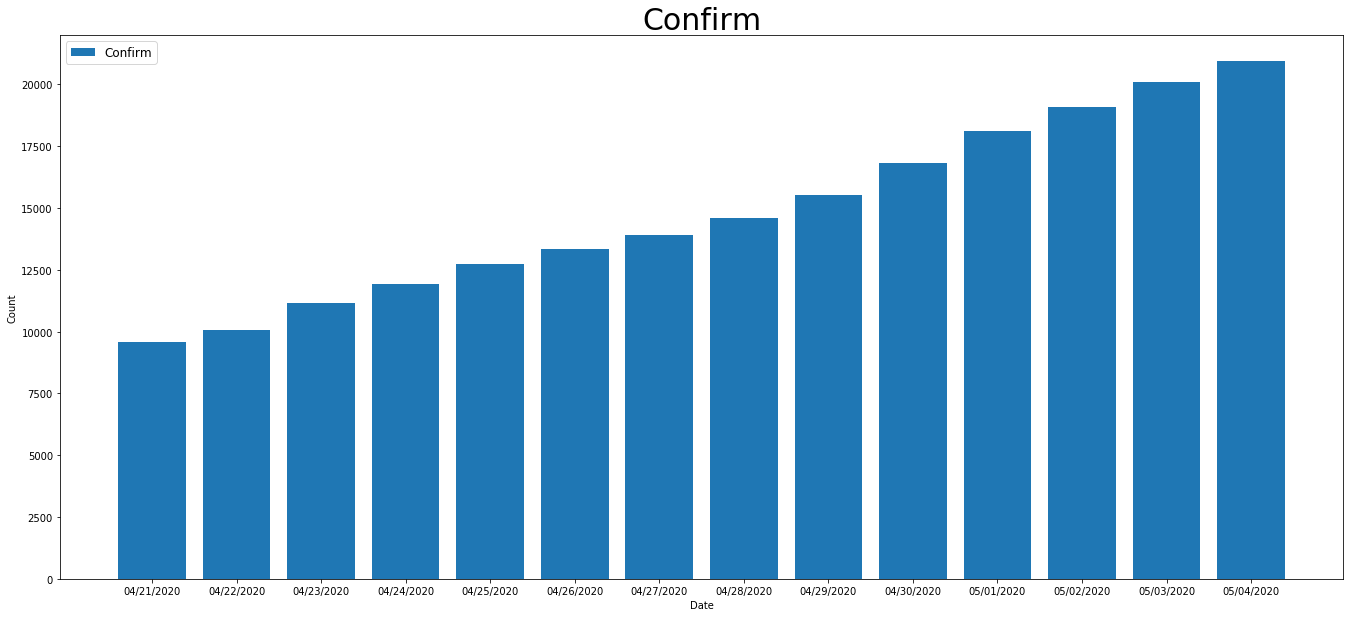

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


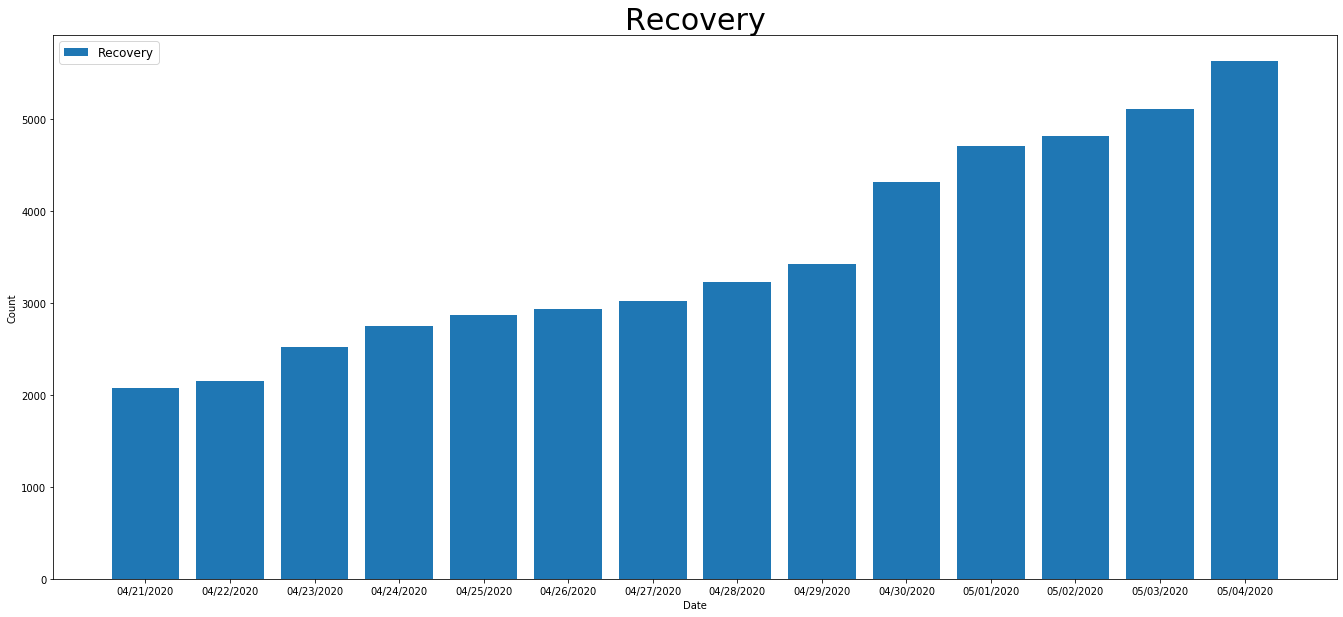

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


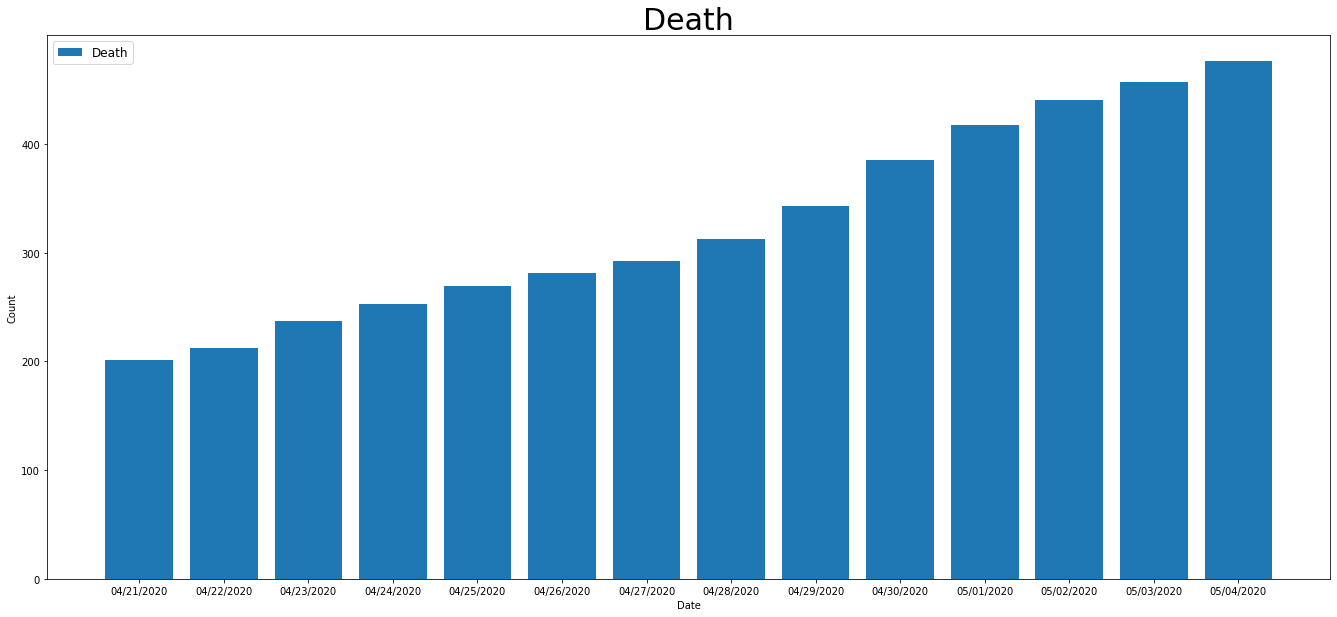

In [238]:
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm',fontsize=30)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Recovered,label="Recovery")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovery',fontsize=30)
plt.show()

plt.figure(figsize=(23,10))

plt.bar(time.ObservationDate, time.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death',fontsize=30)
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


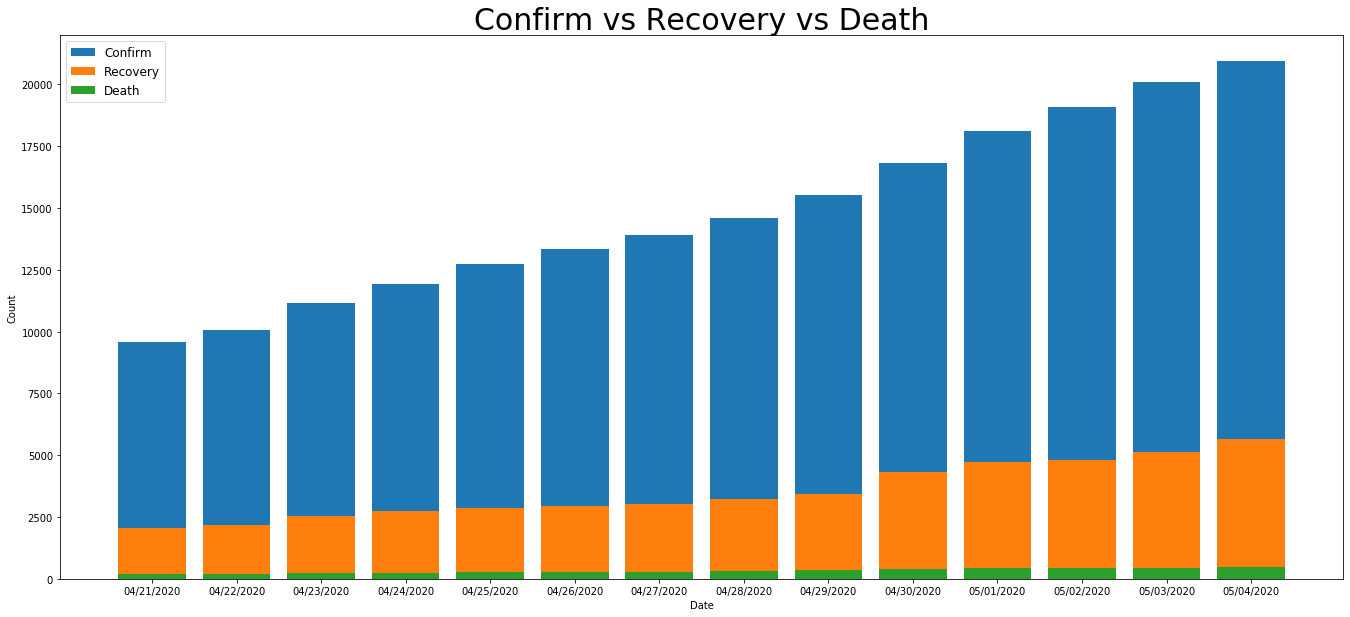

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

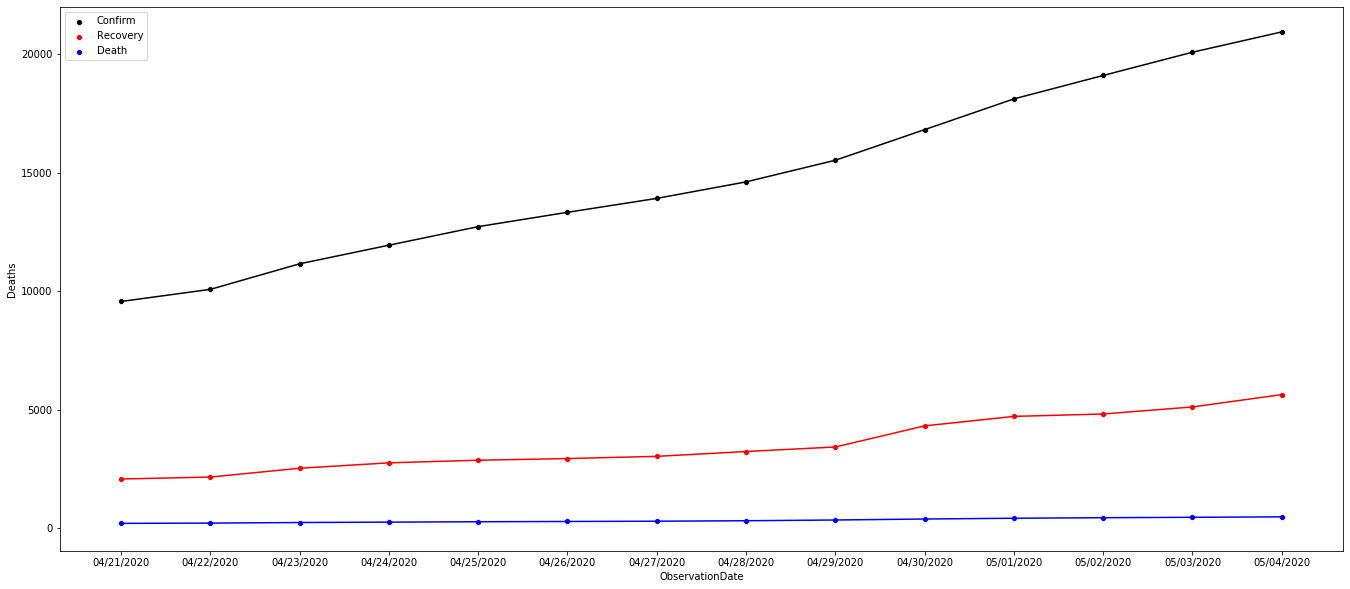

In [239]:
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed,label="Confirm")
plt.bar(time.ObservationDate, time.Recovered,label="Recovery")
plt.bar(time.ObservationDate, time.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed", data=time,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="ObservationDate", y="Recovered", data=time,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths", data=time,
             color="blue",label = "Death")
plt.plot(time.ObservationDate,time.Confirmed,zorder=1,color="black")
plt.plot(time.ObservationDate,time.Recovered,zorder=1,color="red")
plt.plot(time.ObservationDate,time.Deaths,zorder=1,color="blue")

In [208]:
Total_confirmed = time['Confirmed'].sum()
Total_recovered = time['Recovered'].sum()
Total_death = time['Deaths'].sum()
data = [['Confirmed', Total_confirmed], ['Recovered', Total_recovered], ['Death', Total_death]] 
df = pd.DataFrame(data, columns = ['state', 'count']) 
fig = px.pie(df,
             values="count",
             names="state",
             title="State of Patient",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Daily Growth

In [209]:
time['Confirmed_new'] = time['Confirmed']-time['Confirmed'].shift(1)
time['Recovered_new'] = time['Recovered']-time['Recovered'].shift(1)
time['Deaths_new'] = time['Deaths']-time['Deaths'].shift(1)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


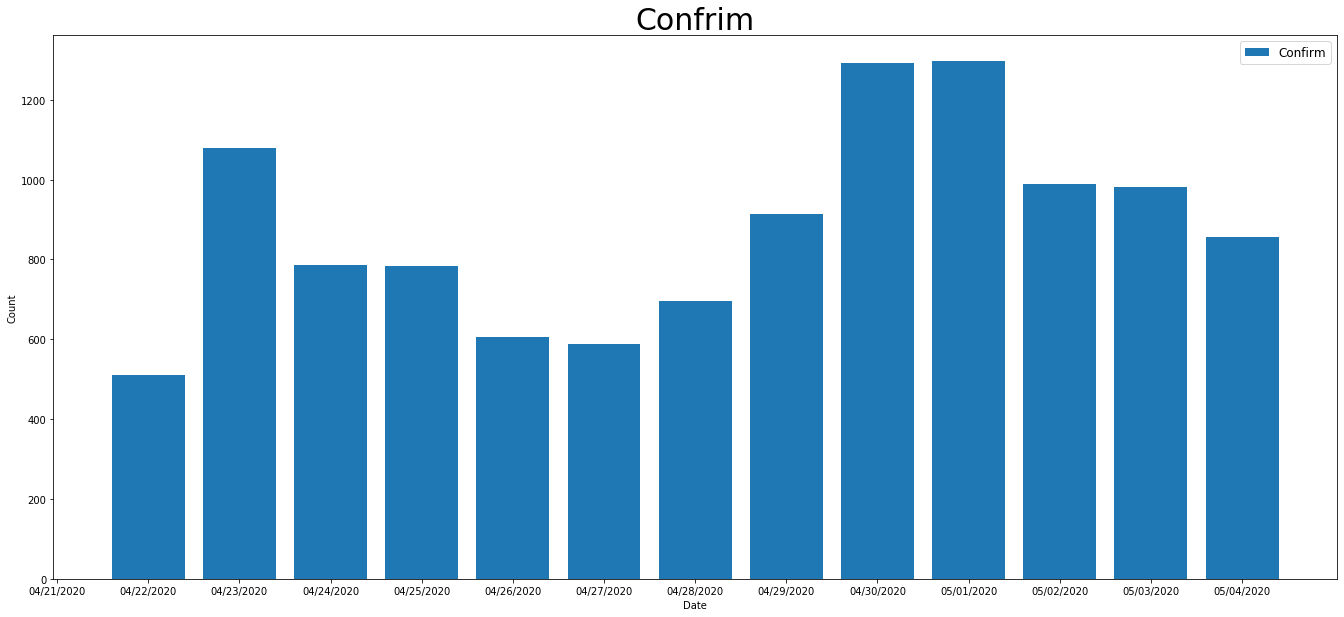

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


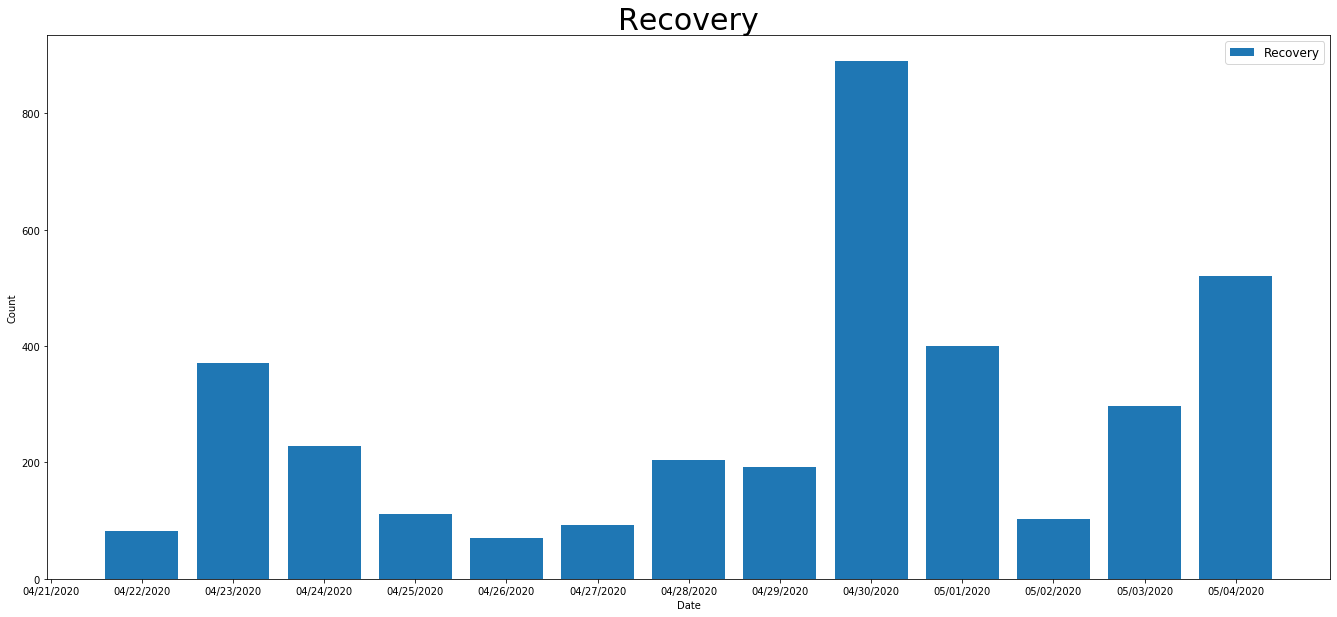

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


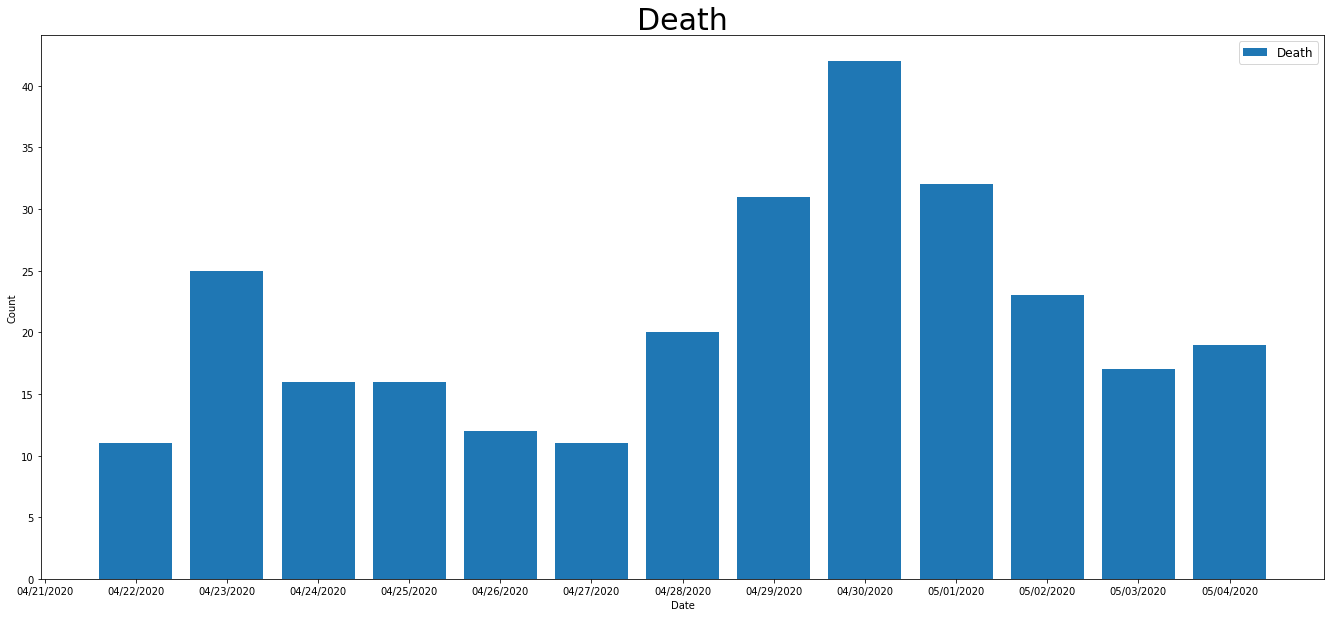

In [210]:
plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Confirmed_new,label="Confirm")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim',fontsize=30)
plt.show()


plt.figure(figsize=(23,10))
plt.bar(time.ObservationDate, time.Recovered_new,label="Recovery")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovery',fontsize=30)
plt.show()

plt.figure(figsize=(23,10))

plt.bar(time.ObservationDate, time.Deaths_new,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death',fontsize=30)
plt.show()



INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

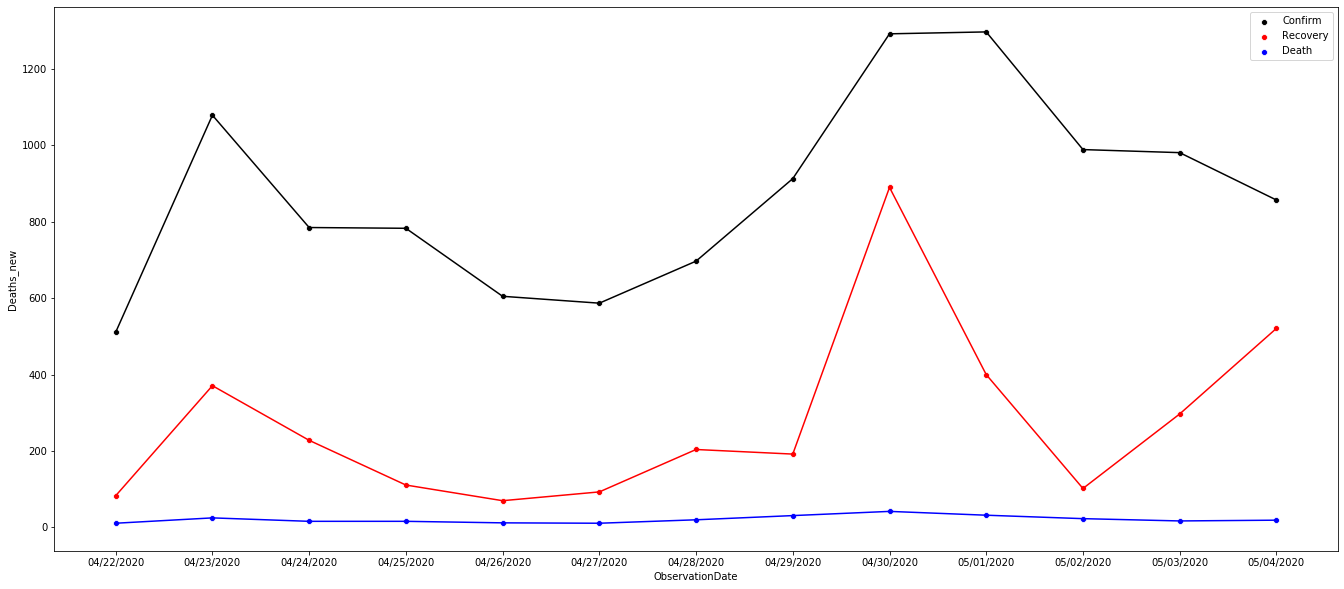

In [240]:
f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed_new", data=time,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="ObservationDate", y="Recovered_new", data=time,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths_new", data=time,
             color="blue",label = "Death")
plt.plot(time.ObservationDate,time.Confirmed_new,zorder=1,color="black")
plt.plot(time.ObservationDate,time.Recovered_new,zorder=1,color="red")
plt.plot(time.ObservationDate,time.Deaths_new,zorder=1,color="blue")

In [212]:
global_data = time

# Growth Rate and Ratio

In [213]:
# This functions smooths data, thanks to Dan Pearson. We will use it to smooth the data for growth factor.
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    f, ax = plt.subplots(figsize=(15,5))
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    return 

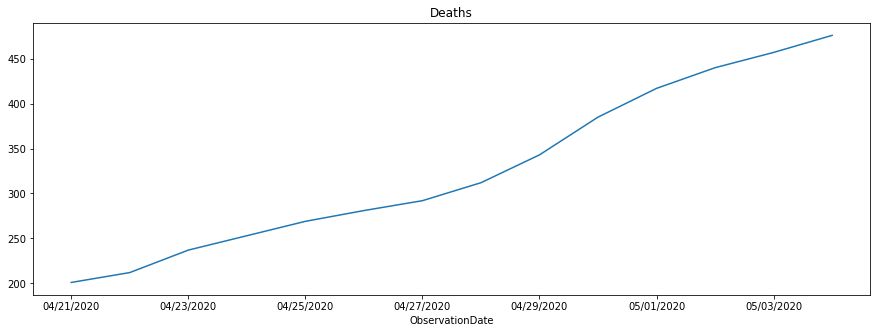

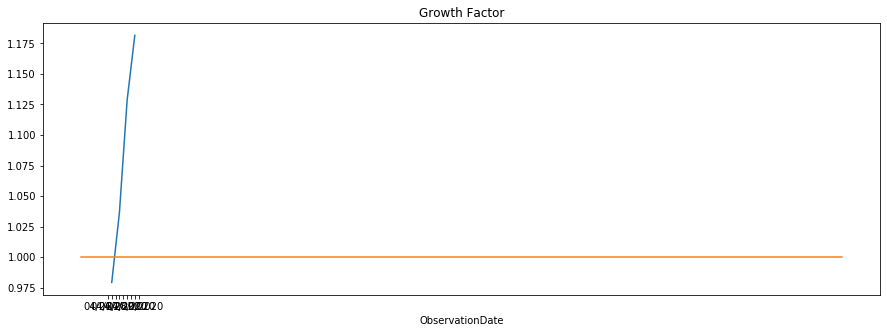

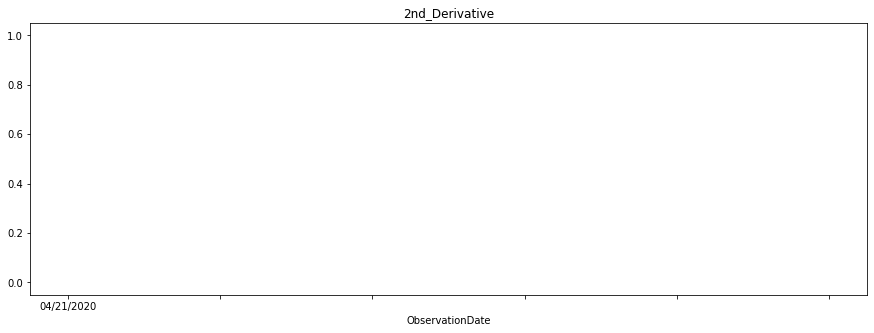

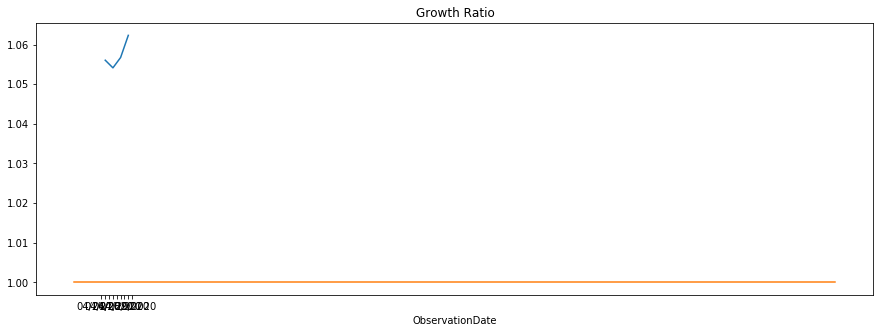

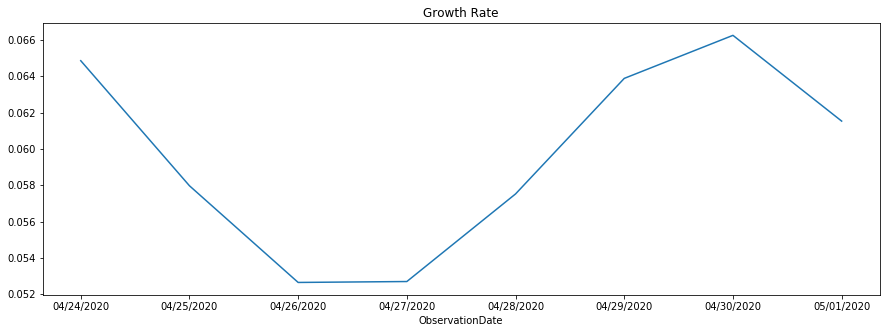

In [214]:
plot_country_active_confirmed_recovered('Pakistan')

In [215]:
x = np.arange(len(time)).reshape(-1, 1)
y = time['Confirmed'].values

# Regression Model

In [216]:
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)

In [219]:
date_rng = pd.date_range(start='04/21/2020', end='05/04/2020', freq='D')

In [221]:
test = np.arange(len(time)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [date_rng[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

### Graphical representatoin of current confirmed and predicted confirmed

In [222]:
ser = pd.Series(time['Confirmed']) 
accumulated_count = pd.Series(ser.values, index=date_rng)

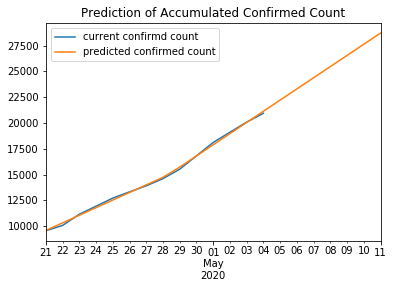

In [223]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()


# Fb Prophet

In [225]:
prophet= pd.DataFrame(accumulated_count)
prophet
pr_data = prophet.reset_index()
pr_data.columns = ['ds','y']
pr_data.head()

,ds,y
0,2020-04-21,9565.0
1,2020-04-22,10076.0
2,2020-04-23,11155.0
3,2020-04-24,11940.0
4,2020-04-25,12723.0


### Prediction

In [226]:
m=Prophet()
m.fit(pr_data)
future=m.make_future_dataframe(periods=15)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-21,9559.972769,9535.777708,9583.986706,9559.972769,9559.972769,0.0,0.0,0.0,0.0,0.0,0.0,9559.972769
1,2020-04-22,10091.184892,10066.740689,10118.919102,10091.184892,10091.184892,0.0,0.0,0.0,0.0,0.0,0.0,10091.184892
2,2020-04-23,11144.780810,11117.943761,11172.084654,11144.780810,11144.780810,0.0,0.0,0.0,0.0,0.0,0.0,11144.780810
3,2020-04-24,11940.048003,11913.374345,11967.292591,11940.048003,11940.048003,0.0,0.0,0.0,0.0,0.0,0.0,11940.048003
4,2020-04-25,12720.972790,12693.731314,12748.126307,12720.972790,12720.972790,0.0,0.0,0.0,0.0,0.0,0.0,12720.972790
5,2020-04-26,13322.001619,13295.392169,13347.439789,13322.001619,13322.001619,0.0,0.0,0.0,0.0,0.0,0.0,13322.001619
6,2020-04-27,13923.030444,13896.520688,13948.921437,13923.030444,13923.030444,0.0,0.0,0.0,0.0,0.0,0.0,13923.030444
7,2020-04-28,14612.081803,14585.588340,14636.839905,14612.081803,14612.081803,0.0,0.0,0.0,0.0,0.0,0.0,14612.081803
8,2020-04-29,15524.668355,15498.533159,15549.920103,15524.668355,15524.668355,0.0,0.0,0.0,0.0,0.0,0.0,15524.668355
9,2020-04-30,16827.609208,16803.112676,16853.759656,16827.609208,16827.609208,0.0,0.0,0.0,0.0,0.0,0.0,16827.609208


## Graphical Representation of Prediction

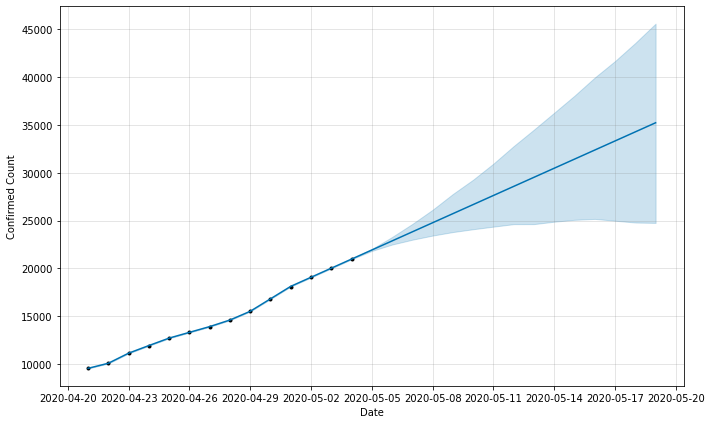

In [227]:
figure = plot_plotly(m, forecast)
py.iplot(figure) 

figure = m.plot(forecast,xlabel='Date',ylabel='Confirmed Count')


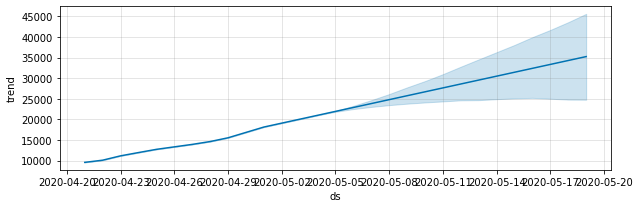

In [228]:
figure=m.plot_components(forecast)

**Prevention**  
![](https://www.koonewyork.com/wp-content/uploads/2019/08/Pakistan1-770x462.jpg)



   To avoid the critical situation people are suggested to do following things  
*     Avoid contact with people who are sick. 
*     Avoid touching your eyes, nose, and mouth. 
*     Stay home when you are sick. 
*     Cover your cough or sneeze with a tissue, then throw the tissue in the trash. 
*    Clean and disinfect frequently touched objects and surfaces using a regular household  
*    Wash your hands often with soap and water, especially after going to the bathroom; before eating; and after blowing     your nose, coughing, or sneezing. If soap and water are not readily available, use an alcohol-based hand sanitizer.